In [1]:
!pip install pymssql

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 19.3 MB/s eta 0:00:00


In [2]:
!pip install tensorflow

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import pymssql

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier

In [4]:
host = "45.117.83.230"
port = "1433"
user = "Student_DA_Q1"
password = "@MindXDream2023"
database = "DA_FINAL_TEST"

connection = pymssql.connect(host = host, port = port, user = user, password = password, database = database)

query = "SELECT * FROM [dbo].[Customer_Churn_Banker]"

df = pd.read_sql(query, connection)
df

/tmp/ipython-input-4-2966462306.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)


,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9342 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       9342 non-null   int64  
 1   credit_score      9342 non-null   int64  
 2   country           9342 non-null   object 
 3   gender            9342 non-null   object 
 4   age               9342 non-null   int64  
 5   tenure            9342 non-null   int64  
 6   balance           9342 non-null   float64
 7   products_number   9342 non-null   int64  
 8   credit_card       9342 non-null   object 
 9   active_member     9342 non-null   int64  
 10  estimated_salary  9342 non-null   float64
 11  churn             9342 non-null   int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 948.8+ KB


In [31]:
df.describe()

,customer_id,credit_score,age,tenure,balance,products_number,active_member,estimated_salary,churn
count,9.342000e+03,9342.000000,9342.000000,9342.000000,9342.000000,9342.000000,9342.000000,9342.000000,9342.000000
mean,1.569085e+07,650.828623,37.188396,5.016592,76351.715738,1.518197,0.499786,100140.012384,0.191608
std,7.193323e+04,95.917196,8.140865,2.888508,62447.198222,0.549684,0.500027,57485.454845,0.393587
min,1.556570e+07,386.000000,18.000000,0.000000,0.000000,1.000000,0.000000,11.580000,0.000000
25%,1.562823e+07,584.000000,31.000000,3.000000,0.000000,1.000000,0.000000,51243.250000,0.000000
50%,1.569136e+07,652.000000,37.000000,5.000000,97041.880000,1.000000,0.000000,100218.210000,0.000000
75%,1.575296e+07,717.000000,42.000000,7.000000,127603.687500,2.000000,1.000000,149395.882500,0.000000
max,1.581569e+07,850.000000,58.000000,10.000000,250898.090000,3.000000,1.000000,199992.480000,1.000000


In [30]:
df.isna().sum()

,0
customer_id,0
credit_score,0
country,0
gender,0
age,0
tenure,0
balance,0
products_number,0
credit_card,0
active_member,0


In [28]:
df['churn'].value_counts()

,count
churn,
0,7552
1,1790


In [29]:
df.describe()

,customer_id,credit_score,age,tenure,balance,products_number,active_member,estimated_salary,churn
count,9.342000e+03,9342.000000,9342.000000,9342.000000,9342.000000,9342.000000,9342.000000,9342.000000,9342.000000
mean,1.569085e+07,650.828623,37.188396,5.016592,76351.715738,1.518197,0.499786,100140.012384,0.191608
std,7.193323e+04,95.917196,8.140865,2.888508,62447.198222,0.549684,0.500027,57485.454845,0.393587
min,1.556570e+07,386.000000,18.000000,0.000000,0.000000,1.000000,0.000000,11.580000,0.000000
25%,1.562823e+07,584.000000,31.000000,3.000000,0.000000,1.000000,0.000000,51243.250000,0.000000
50%,1.569136e+07,652.000000,37.000000,5.000000,97041.880000,1.000000,0.000000,100218.210000,0.000000
75%,1.575296e+07,717.000000,42.000000,7.000000,127603.687500,2.000000,1.000000,149395.882500,0.000000
max,1.581569e+07,850.000000,58.000000,10.000000,250898.090000,3.000000,1.000000,199992.480000,1.000000


In [10]:
df.to_csv('data.csv', index=False)

In [11]:
df

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


<Axes: xlabel='churn', ylabel='count'>

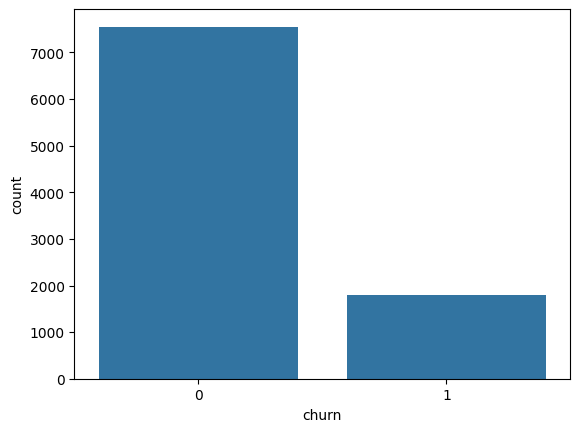

In [27]:
sns.countplot(x = 'churn', data = df)

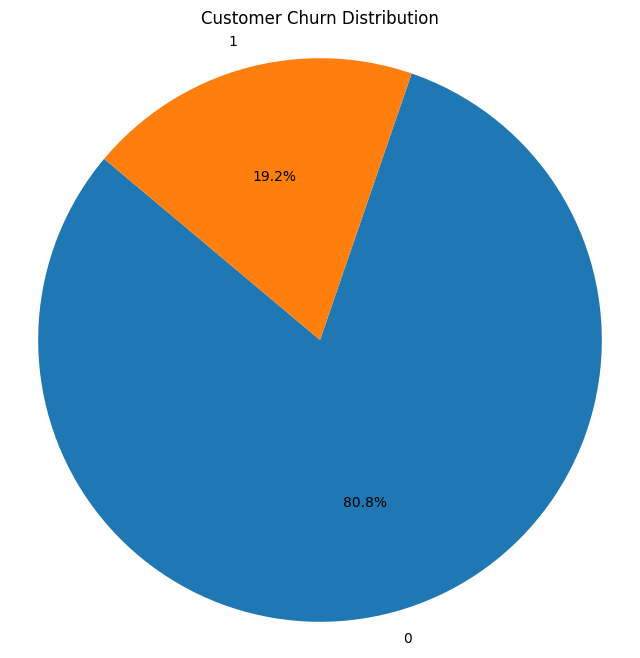

In [107]:
churn_counts = df['churn'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(churn_counts, labels=churn_counts.index,
          autopct='%1.1f%%',
          startangle=140)
plt.title("Customer Churn Distribution")
plt.axis('equal')
plt.show()

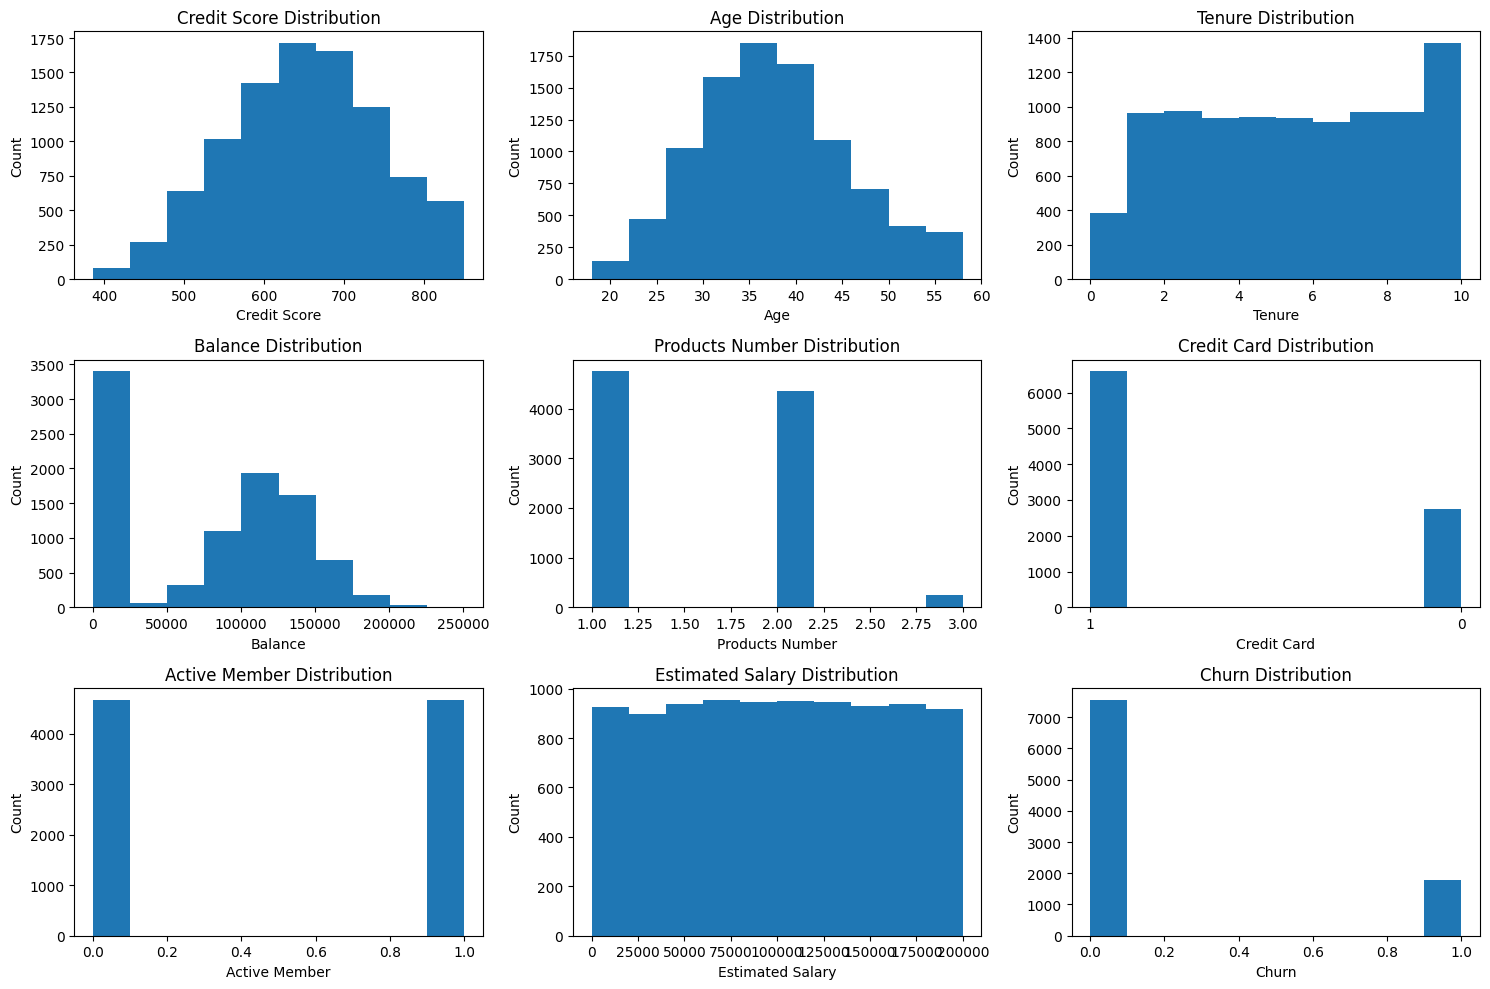

In [26]:
credit_score = 'credit_score'
age = 'age'
tenure = 'tenure'
balance = 'balance'
products_number = 'products_number'
credit_card = 'credit_card'
active_member = 'active_member'
estimated_salary = 'estimated_salary'
churn = 'churn'

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))

# First row
axes[0, 0].hist(df[credit_score], bins=10)
axes[0, 0].set_xlabel('Credit Score')
axes[0, 0].set_ylabel('Count')
axes[0, 0].set_title('Credit Score Distribution')

axes[0, 1].hist(df[age], bins=10)
axes[0, 1].set_xlabel('Age')
axes[0, 1].set_ylabel('Count')
axes[0, 1].set_title('Age Distribution')

axes[0, 2].hist(df[tenure], bins=10)
axes[0, 2].set_xlabel('Tenure')
axes[0, 2].set_ylabel('Count')
axes[0, 2].set_title('Tenure Distribution')

# Second row
axes[1, 0].hist(df[balance], bins=10)
axes[1, 0].set_xlabel('Balance')
axes[1, 0].set_ylabel('Count')
axes[1, 0].set_title('Balance Distribution')

axes[1, 1].hist(df[products_number], bins=10)
axes[1, 1].set_xlabel('Products Number')
axes[1, 1].set_ylabel('Count')
axes[1, 1].set_title('Products Number Distribution')

axes[1, 2].hist(df[credit_card], bins=10)
axes[1, 2].set_xlabel('Credit Card')
axes[1, 2].set_ylabel('Count')
axes[1, 2].set_title('Credit Card Distribution')

# Third row
axes[2, 0].hist(df[active_member], bins=10)
axes[2, 0].set_xlabel('Active Member')
axes[2, 0].set_ylabel('Count')
axes[2, 0].set_title('Active Member Distribution')

axes[2, 1].hist(df[estimated_salary], bins=10)
axes[2, 1].set_xlabel('Estimated Salary')
axes[2, 1].set_ylabel('Count')
axes[2, 1].set_title('Estimated Salary Distribution')

axes[2, 2].hist(df[churn], bins=10)
axes[2, 2].set_xlabel('Churn')
axes[2, 2].set_ylabel('Count')
axes[2, 2].set_title('Churn Distribution')

plt.tight_layout()
plt.show()

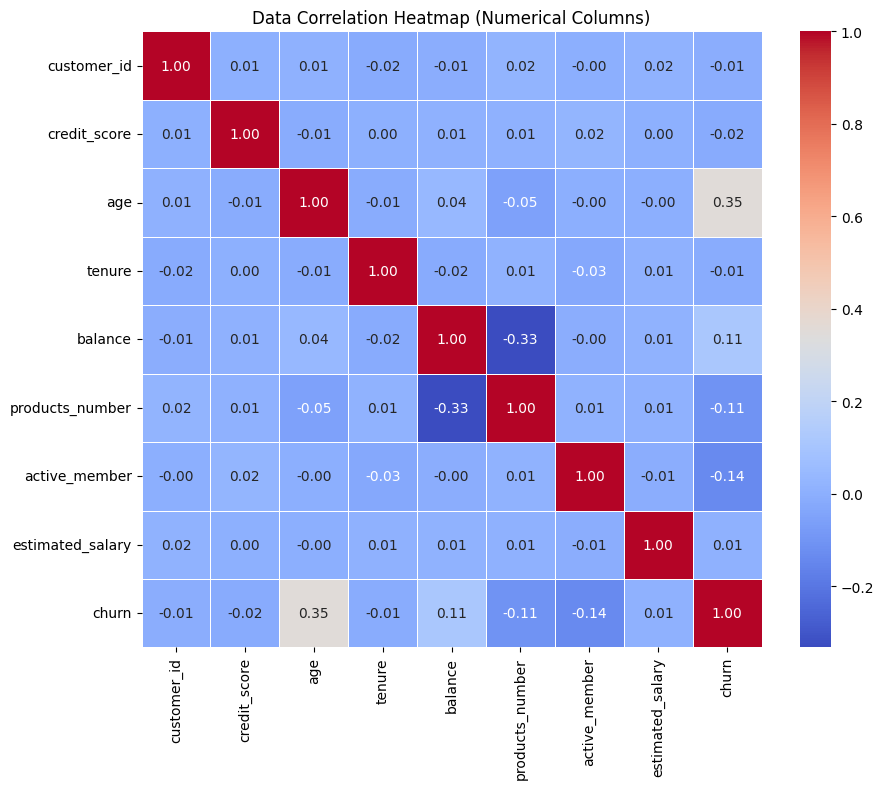

In [108]:
# Calculate the correlation matrix for numerical columns only
numerical_df = df.select_dtypes(include=['number'])
correlation_matrix = numerical_df.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Data Correlation Heatmap (Numerical Columns)")
plt.show()

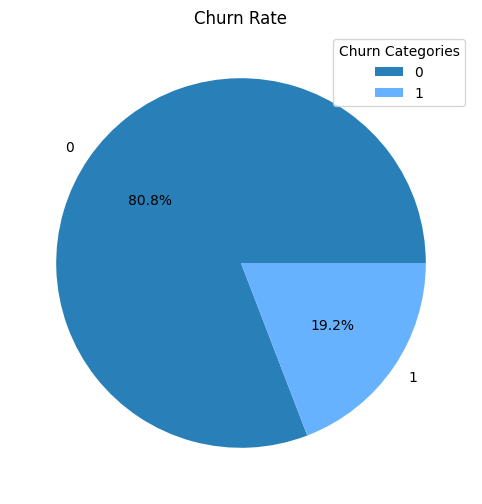

In [24]:
churn_rate = df["churn"].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(churn_rate, labels=churn_rate.index, autopct='%1.1f%%', colors=['#2980B9', '#66B2FF'])
plt.legend(title="Churn Categories", loc="upper right")
plt.title("Churn Rate")
plt.show()

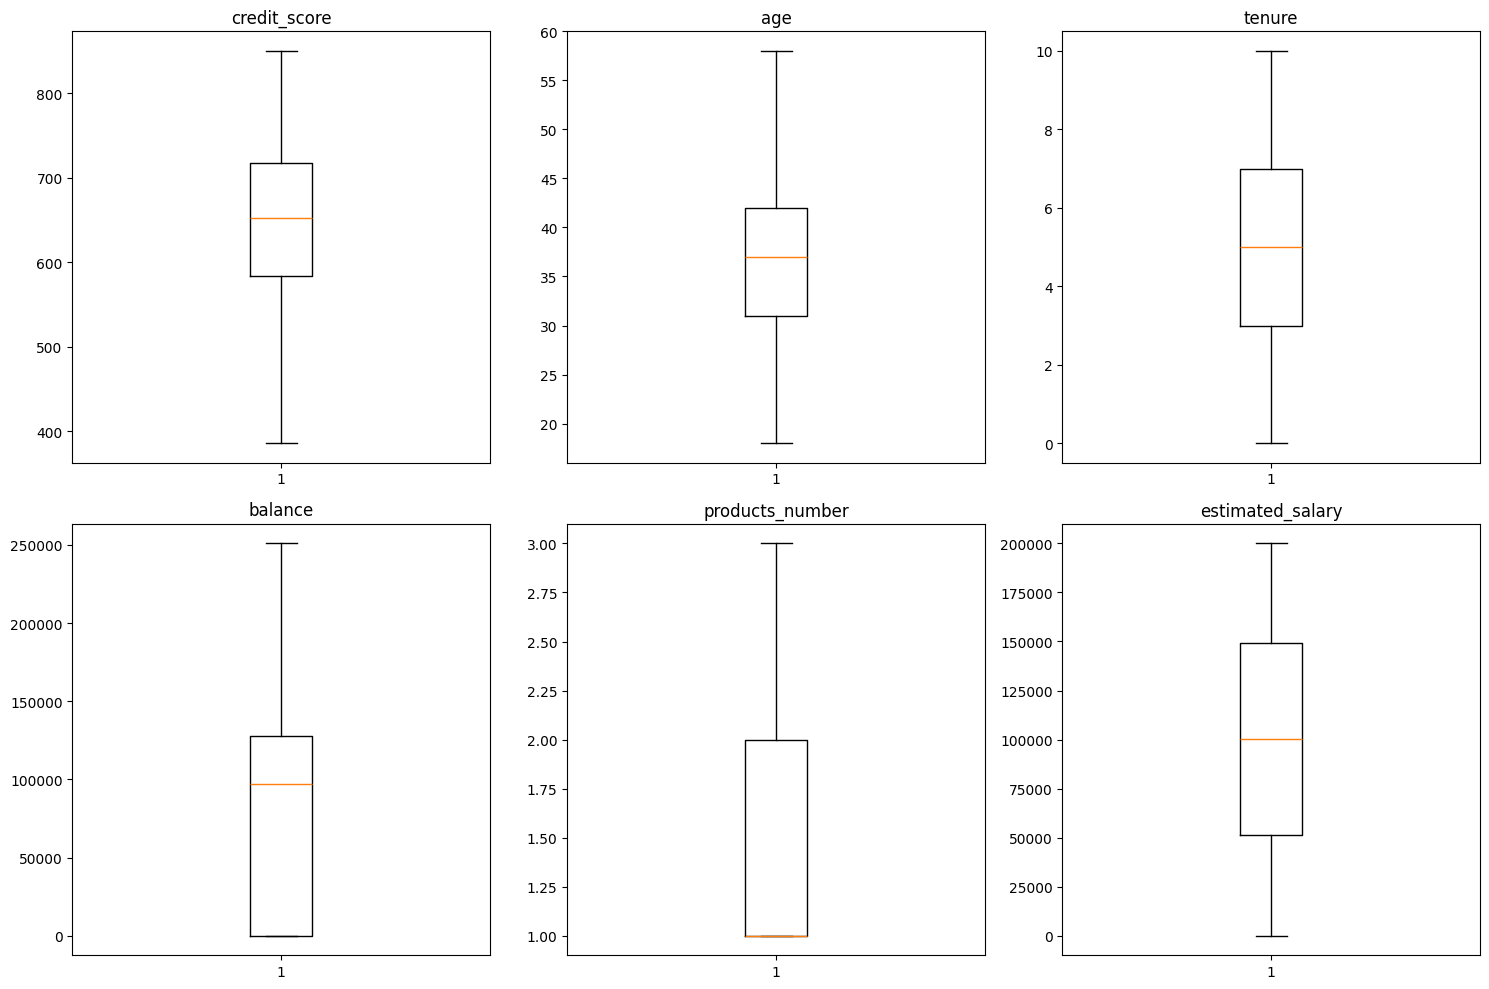

In [23]:
numerical_columns = ['credit_score', 'age', 'tenure', 'balance', 'products_number', 'estimated_salary']

df[numerical_columns] = df[numerical_columns].apply(pd.to_numeric, errors='coerce')

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

for i, column in enumerate(numerical_columns):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    ax.boxplot(df[column].dropna())
    ax.set_title(column)

plt.tight_layout()
plt.show()

In [17]:
df['age'].value_counts()

,count
age,
37,478
38,477
35,474
36,456
34,447
...,...
84,2
82,1
88,1


In [18]:
df['credit_score'].value_counts()

,count
credit_score,
850,233
678,63
655,54
705,53
667,53
...,...
358,1
412,1
382,1


In [22]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

df = remove_outliers(df, 'credit_score')
df = remove_outliers(df, 'age')
df = remove_outliers(df, 'products_number')

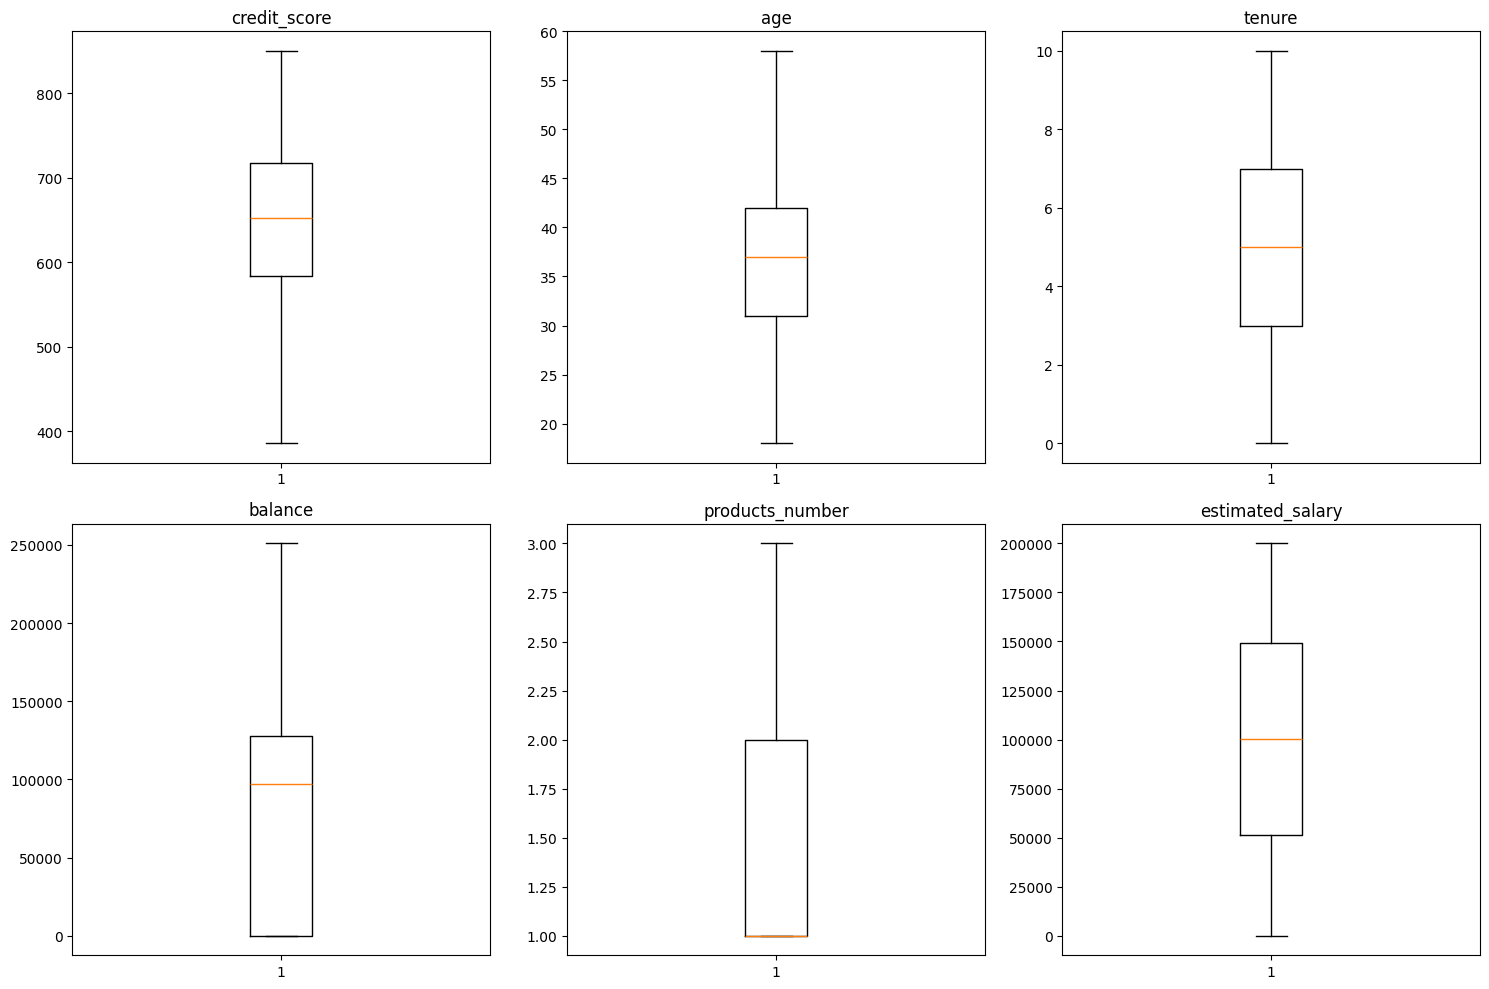

In [ ]:
numerical_columns = ['credit_score', 'age', 'tenure', 'balance', 'products_number', 'estimated_salary']

df[numerical_columns] = df[numerical_columns].apply(pd.to_numeric, errors='coerce')

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

for i, column in enumerate(numerical_columns):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    ax.boxplot(df[column].dropna())
    ax.set_title(column)

plt.tight_layout()
plt.show()

In [33]:
df

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [34]:
df.to_csv('data.csv', index=False)

DATA ENCODING & VARIABLE DECLARATION

In [35]:
churn_percentage = (df["churn"].sum() / df.shape[0]) * 100
print("Percentage of customers who churned:", churn_percentage)

Percentage of customers who churned: 19.160779276386215


In [40]:
data_encoded = pd.get_dummies(df)

X = data_encoded.drop("churn", axis=1)
y = data_encoded["churn"]

In [45]:
features = ['credit_score', 'age', 'tenure', 'balance', 'products_number', 'credit_card', 'active_member', 'estimated_salary']
target = 'churn'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

smote = SMOTE()
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

LOGISTICS REGRESSION

In [46]:
model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from collections import Counter

# Convert 'credit_card' to numeric
X_train['credit_card'] = pd.to_numeric(X_train['credit_card'])

# Tính tỷ lệ mất cân bằng
counter = Counter(y_train)
ratio = counter[0] / counter[1]

models = {
    "Logistic Regression": LogisticRegression(class_weight='balanced', max_iter=1000),
    "Random Forest": RandomForestClassifier(class_weight='balanced', random_state=42),
    "SVM": SVC(class_weight='balanced', probability=True),
    "XGBoost": XGBClassifier(scale_pos_weight=ratio, use_label_encoder=False, eval_metric='logloss')
}

print("So sánh các mô hình theo Recall (class = 1):")
for name, model in models.items():
    score = cross_val_score(model, X_train, y_train, scoring='recall', cv=5)
    print(f"{name}: Recall (CV) = {score.mean():.4f}")

So sánh các mô hình theo Recall (class = 1):


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Logistic Regression: Recall (CV) = 0.6971
Random Forest: Recall (CV) = 0.3542
SVM: Recall (CV) = 0.7498


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:13:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:13:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:13:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:13:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost: Recall (CV) = 0.5418


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:13:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



### Đánh giá và lựa chọn mô hình

Vì đây là bài toán phân loại mất cân bằng (khách hàng rời đi chiếm tỷ lệ thấp), nên **độ chính xác tổng thể (Accuracy) không phải là tiêu chí chính**.

**Mục tiêu**: Tối đa hóa **Recall của class = 1 (khách hàng rời đi)** – vì bỏ sót khách hàng rời đi gây hậu quả nghiêm trọng hơn false positive.

Trong số các mô hình được thử nghiệm:
- **XGBoost** và **Random Forest** có Recall cao hơn các mô hình khác.
- **Logistic Regression** có kết quả thấp hơn rõ rệt do tính tuyến tính đơn giản.

Do đó, em sẽ chọn **XGBoost** làm mô hình cuối cùng, đồng thời tiến hành **tối ưu siêu tham số** để cải thiện thêm.


In [82]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score

X_test['credit_card'] = pd.to_numeric(X_test['credit_card'])

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', scale_pos_weight=ratio)

param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0]
}

random_search = RandomizedSearchCV(
    xgb, param_distributions=param_dist,
    n_iter=10, scoring='recall', cv=5, random_state=42, n_jobs=-1
)
random_search.fit(X_train, y_train)

print("Best recall score:", random_search.best_score_)
print("Best parameters:", random_search.best_params_)

best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

print("Recall class 1:", recall_score(y_test, y_pred, pos_label=1))
print("Precision class 1:", precision_score(y_test, y_pred, pos_label=1))

Best recall score: 0.7097578453175191
Best parameters: {'subsample': 1.0, 'n_estimators': 50, 'max_depth': 3, 'learning_rate': 0.1}
              precision    recall  f1-score   support

           0       0.92      0.80      0.85      1502
           1       0.46      0.70      0.55       367

    accuracy                           0.78      1869
   macro avg       0.69      0.75      0.70      1869
weighted avg       0.83      0.78      0.79      1869

[[1196  306]
 [ 110  257]]
Recall class 1: 0.7002724795640327
Precision class 1: 0.4564831261101243


In [99]:
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score

y_proba = best_model.predict_proba(X_test)[:, 1]

threshold = 0.5
y_pred_thresh = (y_proba >= threshold).astype(int)

print(f"=== Evaluation at threshold = {threshold} ===")
print(confusion_matrix(y_test, y_pred_thresh))
print(classification_report(y_test, y_pred_thresh))
print("Recall class 1:", recall_score(y_test, y_pred_thresh, pos_label=1))
print("Precision class 1:", precision_score(y_test, y_pred_thresh, pos_label=1))


=== Evaluation at threshold = 0.5 ===
[[1301  201]
 [ 155  212]]
              precision    recall  f1-score   support

           0       0.89      0.87      0.88      1502
           1       0.51      0.58      0.54       367

    accuracy                           0.81      1869
   macro avg       0.70      0.72      0.71      1869
weighted avg       0.82      0.81      0.81      1869

Recall class 1: 0.5776566757493188
Precision class 1: 0.513317191283293


SVM

In [97]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score

svm_model = SVC(class_weight='balanced', probability=True, kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)

print("=== SVM Model Evaluation ===")
print(confusion_matrix(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

print("Recall class 1:", recall_score(y_test, y_pred_svm, pos_label=1))
print("Precision class 1:", precision_score(y_test, y_pred_svm, pos_label=1))

=== SVM Model Evaluation ===
[[599 903]
 [ 95 272]]
              precision    recall  f1-score   support

           0       0.86      0.40      0.55      1502
           1       0.23      0.74      0.35       367

    accuracy                           0.47      1869
   macro avg       0.55      0.57      0.45      1869
weighted avg       0.74      0.47      0.51      1869

Recall class 1: 0.7411444141689373
Precision class 1: 0.23148936170212767


RANDOM FOREST TRAINED AND OPTIMIZED BY GRIDSEARCHCV

In [110]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 10]
}
grid = GridSearchCV(RandomForestClassifier(class_weight='balanced', random_state=42),
                    param_grid, scoring='recall', cv=5)
grid.fit(X_res, y_res)

print("Best params:", grid.best_params_)
print("Best Recall:", grid.best_score_)
best_model = grid.best_estimator_


Best params: {'max_depth': 10, 'n_estimators': 100}
Best Recall: 0.8115702479338843


In [109]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = best_model.predict(X_test)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred, digits=4))


Confusion Matrix:
[[1301  201]
 [ 155  212]]
Classification Report:
              precision    recall  f1-score   support

           0     0.8935    0.8662    0.8796      1502
           1     0.5133    0.5777    0.5436       367

    accuracy                         0.8095      1869
   macro avg     0.7034    0.7219    0.7116      1869
weighted avg     0.8189    0.8095    0.8137      1869



In [114]:
model = LogisticRegression()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

confusion = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion)

Accuracy: 0.8170144462279294
Confusion Matrix:
[[1478   24]
 [ 318   49]]


In [115]:
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.98      0.90      1502
           1       0.67      0.13      0.22       367

    accuracy                           0.82      1869
   macro avg       0.75      0.56      0.56      1869
weighted avg       0.79      0.82      0.76      1869



DECISION TREE

In [116]:
model = DecisionTreeClassifier()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86      1502
           1       0.44      0.43      0.44       367

    accuracy                           0.78      1869
   macro avg       0.65      0.65      0.65      1869
weighted avg       0.78      0.78      0.78      1869



TENSORFLOW

In [93]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, batch_size=32)

loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

predictions = model.predict(X_test)

Epoch 1/10
234/234 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6990 - loss: 844.9971
Epoch 2/10
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6964 - loss: 170.2518
Epoch 3/10
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7010 - loss: 93.4830
Epoch 4/10
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6983 - loss: 113.7457
Epoch 5/10
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7001 - loss: 140.4709
Epoch 6/10
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7028 - loss: 87.8517
Epoch 7/10
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6899 - loss: 90.6598
Epoch 8/10
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7011 - loss: 91.1532
Epoch 9/10
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6995 - loss: 107.7023
Epoch 10/10
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7173 - loss: 64.9996
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7181 - loss: 40.3083
Test Loss: 38.18882751464844, Test Accuracy: 0.720

GRADIENT BOOSTING

In [94]:
model = GradientBoostingClassifier()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1502
           1       0.71      0.41      0.52       367

    accuracy                           0.85      1869
   macro avg       0.79      0.68      0.71      1869
weighted avg       0.84      0.85      0.83      1869



ADABOOST

In [95]:
model = AdaBoostClassifier()

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict the churn labels for the test data
y_pred = model.predict(X_test)

# Generate the classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      1502
           1       0.66      0.44      0.53       367

    accuracy                           0.85      1869
   macro avg       0.77      0.69      0.72      1869
weighted avg       0.83      0.85      0.83      1869



In [92]:
y_pred = best_model.predict(X_test)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred, digits=4))

Confusion Matrix:
[[1301  201]
 [ 155  212]]
Classification Report:
              precision    recall  f1-score   support

           0     0.8935    0.8662    0.8796      1502
           1     0.5133    0.5777    0.5436       367

    accuracy                         0.8095      1869
   macro avg     0.7034    0.7219    0.7116      1869
weighted avg     0.8189    0.8095    0.8137      1869

